In [5]:
import os
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import rbm, RBM_utils

num_threads = 10
os.environ["MKL_NUM_THREADS"] = "%s" % num_threads
os.environ["NUMEXPR_NUM_THREADS"] = "%s" % num_threads
os.environ["OMP_NUM_THREADS"] = "%s" % num_threads
os.environ["OPENBLAS_NUM_THREADS"] = "%s" % num_threads
os.environ["VECLIB_MAXIMUM_THREADS"] = "%s" % num_threads
os.environ["NUMBA_NUM_THREADS"] = "%s" % num_threads

sys.path.append('../PGM3/source/')
sys.path.append('../PGM3/utilities/')




spike_datasets_folder = '/specific/netapp5_2/iscb/wolfson/jeromet/Data/Neuro/spontaneous_zebrafish_spiking_only/'
run = '20180911_Run01'
spikes_location = spike_datasets_folder + run + '__spikes_only.npy'
RBMs_folder = '/specific/netapp5_2/iscb/wolfson/jeromet/Data/Neuro/functional_connectivity/'
RBM_location = RBMs_folder + 'RBM_{run}_hidden_{hidden}_nh_{n_h}_l1_{l1:.2e}_repeat_{repeat}.data'.format(run=run,hidden='dReLU',n_h=200,l1=0.02,repeat=0)
spikes = np.load(spikes_location)
RBM = pickle.load(open(RBM_location,'rb'))
RBM = RBM_utils.swap_sign_RBM(RBM)
h = RBM.mean_hiddens(spikes)

../PGM3/source/layer.py:1167: RuntimeWarning: overflow encountered in true_divide
  ) / (etg_plus / np.sqrt(self._gamma_plus)))


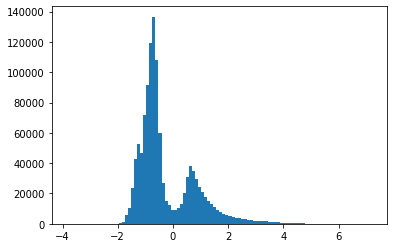

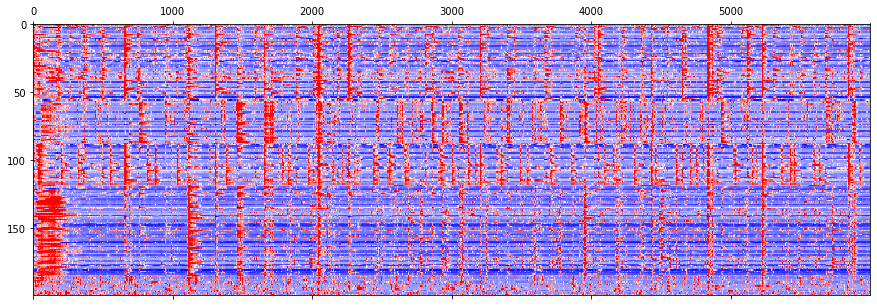

In [22]:
from sklearn.cluster.hierarchical import AgglomerativeClustering
plt.hist(h.flatten(),bins=100); plt.show()

pearson = np.corrcoef(h.T)
d = 1- pearson

clustering = AgglomerativeClustering(n_clusters=10,affinity='precomputed',linkage='average')
labels = clustering.fit_predict(d)
order = np.argsort(labels)
fig, ax = plt.subplots(figsize=(15,5))
ax.matshow(h[:,order].T,aspect='auto',cmap='bwr',vmin=-1.8,vmax=1.8);


Unit 0, P(h=-1)=0.763,P(h=0)=0.030,P(h=+1)=0.207
Unit 1, P(h=-1)=0.677,P(h=0)=0.033,P(h=+1)=0.291
Unit 2, P(h=-1)=0.592,P(h=0)=0.104,P(h=+1)=0.304
Unit 3, P(h=-1)=0.524,P(h=0)=0.084,P(h=+1)=0.392
Unit 4, P(h=-1)=0.707,P(h=0)=0.048,P(h=+1)=0.245
Unit 5, P(h=-1)=0.605,P(h=0)=0.058,P(h=+1)=0.338
Unit 6, P(h=-1)=0.594,P(h=0)=0.074,P(h=+1)=0.332
Unit 7, P(h=-1)=0.806,P(h=0)=0.028,P(h=+1)=0.166
Unit 8, P(h=-1)=0.498,P(h=0)=0.124,P(h=+1)=0.378
Unit 9, P(h=-1)=0.675,P(h=0)=0.066,P(h=+1)=0.259
Unit 10, P(h=-1)=0.671,P(h=0)=0.044,P(h=+1)=0.284
Unit 11, P(h=-1)=0.765,P(h=0)=0.032,P(h=+1)=0.203
Unit 12, P(h=-1)=0.653,P(h=0)=0.095,P(h=+1)=0.252
Unit 13, P(h=-1)=0.673,P(h=0)=0.064,P(h=+1)=0.263
Unit 14, P(h=-1)=0.673,P(h=0)=0.056,P(h=+1)=0.272
Unit 15, P(h=-1)=0.791,P(h=0)=0.022,P(h=+1)=0.186
Unit 16, P(h=-1)=0.597,P(h=0)=0.060,P(h=+1)=0.343
Unit 17, P(h=-1)=0.494,P(h=0)=0.127,P(h=+1)=0.379
Unit 18, P(h=-1)=0.787,P(h=0)=0.037,P(h=+1)=0.175
Unit 19, P(h=-1)=0.773,P(h=0)=0.149,P(h=+1)=0.078
Unit 20, P

/specific/netapp5_2/iscb/wolfson/jeromet/v_env/p36_tf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/specific/netapp5_2/iscb/wolfson/jeromet/v_env/p36_tf/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Unit 179, P(h=-1)=0.726,P(h=0)=0.038,P(h=+1)=0.235
Unit 180, P(h=-1)=0.758,P(h=0)=0.036,P(h=+1)=0.206
Unit 181, P(h=-1)=0.802,P(h=0)=0.030,P(h=+1)=0.168
Unit 182, P(h=-1)=0.799,P(h=0)=0.015,P(h=+1)=0.186
Unit 183, P(h=-1)=0.665,P(h=0)=0.055,P(h=+1)=0.280
Unit 184, P(h=-1)=0.788,P(h=0)=0.029,P(h=+1)=0.183
Unit 185, P(h=-1)=0.695,P(h=0)=0.049,P(h=+1)=0.256
Unit 186, P(h=-1)=0.605,P(h=0)=0.066,P(h=+1)=0.329
Unit 187, P(h=-1)=0.563,P(h=0)=0.111,P(h=+1)=0.326
Unit 188, P(h=-1)=0.697,P(h=0)=0.058,P(h=+1)=0.245
Unit 189, P(h=-1)=0.712,P(h=0)=0.102,P(h=+1)=0.185
Unit 190, P(h=-1)=0.649,P(h=0)=0.079,P(h=+1)=0.272
Unit 191, P(h=-1)=0.647,P(h=0)=0.077,P(h=+1)=0.276
Unit 192, P(h=-1)=0.743,P(h=0)=0.038,P(h=+1)=0.220
Unit 193, P(h=-1)=0.580,P(h=0)=0.094,P(h=+1)=0.326
Unit 194, P(h=-1)=0.609,P(h=0)=0.104,P(h=+1)=0.287
Unit 195, P(h=-1)=0.590,P(h=0)=0.063,P(h=+1)=0.348
Unit 196, P(h=-1)=0.542,P(h=0)=0.091,P(h=+1)=0.367
Unit 197, P(h=-1)=0.663,P(h=0)=0.114,P(h=+1)=0.223
Unit 198, P(h=-1)=0.700,P(h=0)=

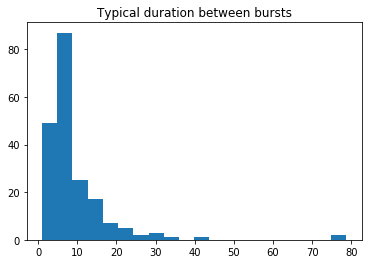

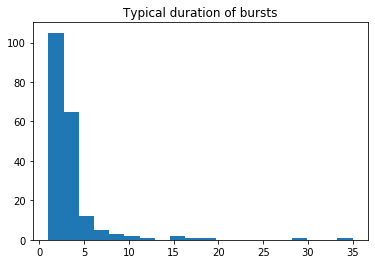

In [111]:
# theta = 0.8
# discrete_h = 1*(h>-theta) + 1*(h>theta)
# print('%.3f,%.3f,%.3f'% (
#     (discrete_h==0).mean(), (discrete_h==1).mean(), (discrete_h==2).mean() 
# ) )



def discretize(h,margin=0.25,plot=False):
    from sklearn.mixture import GaussianMixture
    gmm = GaussianMixture(n_components=2).fit(h[:,np.newaxis])
    mus = gmm.means_
    order = np.argsort(mus[:,0])
    mus = mus[order]
    threshold1 = mus[0] + (mus[1] - mus[0]) * margin
    threshold2 = mus[1] - (mus[1] - mus[0]) * margin
    if plot:
        plt.hist(h,bins=100,normed=True);
        plt.plot([threshold1,threshold1],[0,5],c='red')
        plt.plot([threshold2,threshold2],[0,5],c='red')
        
    return 1*(h>threshold1) + 1*(h>threshold2)



def get_burst_and_silence_times(sequence):
    '''
    Input:  a discrete time series
    Outputs: 
    - a list of burst durations
    - a list of silence durations.
    '''    
    list_burst_intervals = []
    list_silence_intervals = []

    T = len(sequence)

    interval_is_silence = True
    interval_start = 0
    interval_end = 0

    while interval_start < T-1:
        interval_end = interval_start
        if interval_is_silence:
            while (sequence[interval_end] < 2) & (interval_end<T-1):
                interval_end +=1
        else:
            while (sequence[interval_end] > 0) & (interval_end<T-1):
                interval_end +=1
                
        if interval_is_silence:
            if (interval_end<T-1) & (interval_start>0):            
                list_silence_intervals.append((interval_start,interval_end))
            interval_is_silence = False
        else:
            if (interval_end<T-1) & (interval_start>0):            
                list_burst_intervals.append((interval_start,interval_end))
            interval_is_silence = True

        interval_start = interval_end
    list_silence_durations = [end-start for start,end in list_silence_intervals]
    list_burst_durations = [end-start for start,end in list_burst_intervals]
    return list_silence_durations,list_burst_durations    


median_silence_duration = np.zeros(200)
median_burst_duration = np.zeros(200)
count_bursts = np.zeros(200)
for mu in range(200):
    discrete_h = discretize(h[:,mu],margin=0.25)
    print('Unit %s, P(h=-1)=%.3f,P(h=0)=%.3f,P(h=+1)=%.3f'% (
        mu, 
        (discrete_h==0).mean(),
        (discrete_h==1).mean(),
        (discrete_h==2).mean()  )
         )
    list_silence_durations,list_burst_durations = get_burst_and_silence_times(discrete_h)
    median_silence_duration[mu] = np.median(list_silence_durations)
    median_burst_duration[mu] = np.median(list_burst_durations)
    count_bursts[mu] = len(list_burst_durations)


f = 2 # Hz
subset = count_bursts>5
    
s


/specific/netapp5_2/iscb/wolfson/jeromet/v_env/p36_tf/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


177, 0.952,0.023,0.025


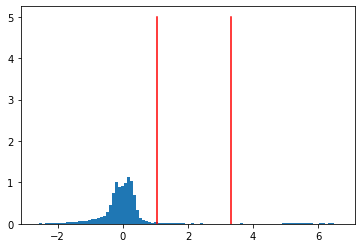

In [112]:
mu = np.argmax(median_burst_duration)

discrete_h = discretize(h[:,mu],margin=0.25,plot=True)
print('%s, %.3f,%.3f,%.3f'% (
    mu, 
    (discrete_h==0).mean(),
    (discrete_h==1).mean(),
    (discrete_h==2).mean()  )
     )

list_silence_durations,list_burst_durations = get_burst_and_silence_times(discrete_h)

